# Transformações lineares e não lineares: teoria e prática.

<p align='justify'>O objetivo principal destas transformações é melhorar determinado aspecto da imagem de entrada para torná-la mais apropriada para uma dada aplicação. Portanto, a escolha da função T determina qual será o efeito visual obtido e deve ser escolhida de acordo com a imagem original e o efeito desejado. Abaixo estão as principais transformações aplicadas nas imagens digitais.

No grupo das transformações lineares, temos:

* Transformação linear: Tem como objetivo aumentar o contraste da imagem de entrada, expandindo o intervalo original de níveis de cinza.

* Transformação inversa: Tem como objetivo produzir o negativo da imagem de entrada.

* Transformação da escala de cinza: Tem como objetivo mapear o intervalo de intensidade da imagem de entrada para um novo intervalo.

No grupo das transformações não lineares, temos:

* Transformação pelo logaritmo: Tem como objetivo aumentar o contraste em regiões escuras da imagem de entrada (valores de cinza baixos).

* Transformação pela raiz quadrada: Tem como objetivo aumentar o contraste das regiões da imagem de entrada com baixa e média intensidades.

* Transformação quadrática: Tem como objetivo aumentar o contraste das regiões da imagem de entrada com média e alta intensidades.<p>

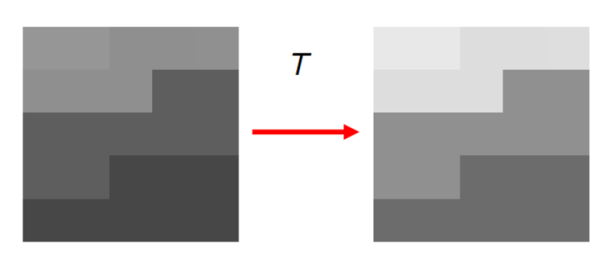




In [ ]:
#importando as bibliotecas necessárias
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

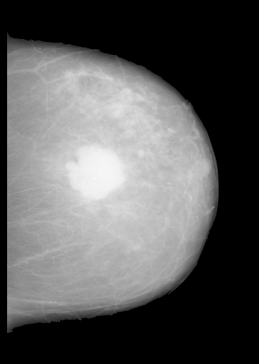

In [49]:
#lendo uma imagem de mamografia digital com a presença de um nódulo
input_image = cv.imread('mamografia.png', 0)
input_image = cv.resize(input_image, dsize = None, fx = 0.5, fy = 0.5) #reduzindo a imagem pela metade do tamanho original
cv2_imshow(input_image)

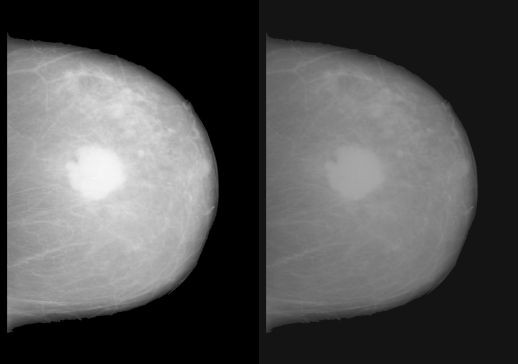

In [50]:
#aplicando a transformação linear
G = 0.6 #associado diretamente com o contraste da imagem
D = 20 #associado diretamente com o brilho da imagem
linear_transformation = (G * input_image) + D 

images = np.hstack([input_image, linear_transformation])
cv2_imshow(images)

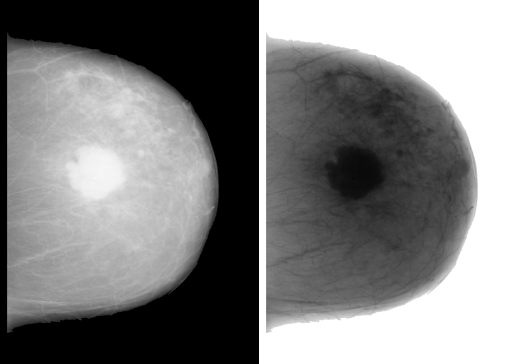

In [ ]:
#aplicando a transformação inversa
inverse_transformation = 255 - input_image

images = np.hstack([input_image, inverse_transformation])
cv2_imshow(images)

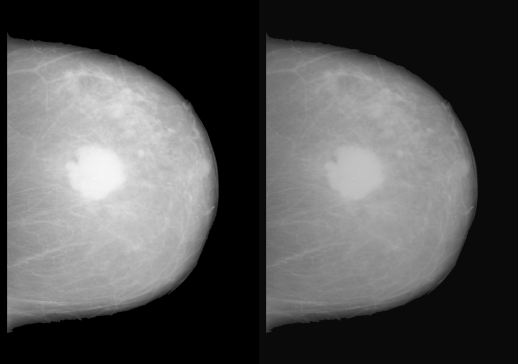

In [ ]:
#aplicando a transformação da escala de cinza
a = input_image.min() #limite inferior do intervalo original
b = input_image.max() #limite superior do intervalo original
c = 10 #limite inferior do intervalo desejado
d = 200 #limite superior do intervalo desejado
grayscale_transformation = (input_image - a) * ((d - c) / (b - a)) + c

images = np.hstack([input_image, grayscale_transformation])
cv2_imshow(images)

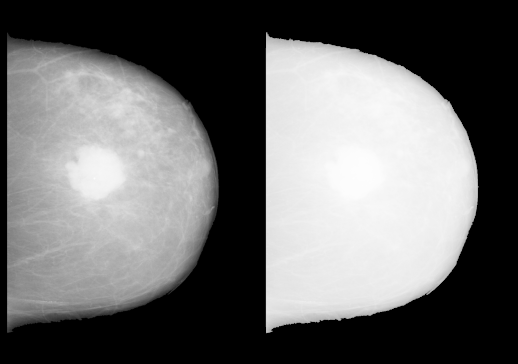

In [ ]:
#aplicando a transformação pelo logaritmo
G = 105.9612 #255/log10(255)
logarithm_transformation = G * np.log10(input_image + 1)

images = np.hstack([input_image, logarithm_transformation])
cv2_imshow(images)

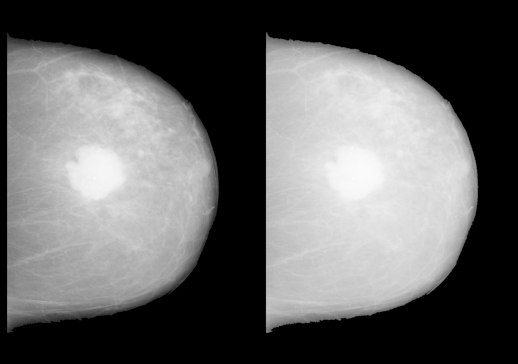

In [ ]:
#aplicando a transformação pela raiz quadrada
G = 15.9687 #255/sqrt(255)
squareroot_transformation = G * np.sqrt(input_image)

images = np.hstack([input_image, squareroot_transformation])
cv2_imshow(images)

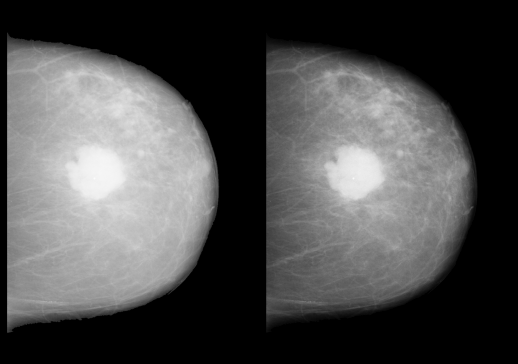

In [ ]:
#aplicando a transformação quadrática
G = 0.0039215 #1/255
quadratic_transformation = np.zeros_like(input_image, np.uint8)

for y in range(input_image.shape[0]):
  for x in range(input_image.shape[1]):
      quadratic_transformation[y, x] = G * (input_image[y, x] ** 2)

images = np.hstack([input_image, quadratic_transformation])
cv2_imshow(images)